# Import Libraries

In [1]:
# Importing libraries
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore

# Load Dataset

In [2]:
# Load the Uber trips Dataset
Uber_df = pd.read_csv(r"C:\Users\jades\Downloads\uber trips data analysis dataset.csv")
print(Uber_df.head(10))
print(Uber_df.shape)

   Trip ID  fare_amount          pickup_datetime  pickup_longitude  \
0  52:06.0          7.5  2015-05-07 19:52:06 UTC        -73.999817   
1  04:56.0          7.7  2009-07-17 20:04:56 UTC        -73.994355   
2  45:00.0         12.9  2009-08-24 21:45:00 UTC        -74.005043   
3  22:21.0          5.3  2009-06-26 08:22:21 UTC        -73.976124   
4  47:00.0         16.0  2014-08-28 17:47:00 UTC        -73.925023   
5  27:09.0          4.9  2011-02-12 02:27:09 UTC        -73.969019   
6  04:00.0         24.5  2014-10-12 07:04:00 UTC        -73.961447   
7  52:00.0          2.5  2012-12-11 13:52:00 UTC          0.000000   
8  32:00.0          9.7  2012-02-17 09:32:00 UTC        -73.975187   
9  06:00.0         12.5  2012-03-29 19:06:00 UTC        -74.001065   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.738354         -73.999512         40.723217                1  
1        40.728225         -73.994710         40.750325                1  
2   

In [3]:
# Data Overview
print(Uber_df.shape)
print(Uber_df.info())
print(Uber_df.columns)

(199999, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Trip ID            199999 non-null  object 
 1   fare_amount        199999 non-null  float64
 2   pickup_datetime    199999 non-null  object 
 3   pickup_longitude   199999 non-null  float64
 4   pickup_latitude    199999 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB
None
Index(['Trip ID', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')


In [4]:
# Summary Statistics
print(Uber_df.describe())

         fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  199999.000000     199999.000000    199999.000000      199999.000000   
mean       11.359892        -72.527631        39.935881         -72.525292   
std         9.901760         11.437815         7.720558          13.117408   
min       -52.000000      -1340.648410       -74.015515       -3356.666300   
25%         6.000000        -73.992065        40.734796         -73.991407   
50%         8.500000        -73.981823        40.752592         -73.980093   
75%        12.500000        -73.967154        40.767158         -73.963659   
max       499.000000         57.418457      1644.421482        1153.572603   

       dropoff_latitude  passenger_count  
count     199999.000000    199999.000000  
mean          39.923890         1.684543  
std            6.794829         1.385995  
min         -881.985513         0.000000  
25%           40.733823         1.000000  
50%           40.753042         1.00000

# Missing value checking 

In [5]:
# Data Cleaning: Check for Missing Values and Duplicates
print(Uber_df.duplicated().sum())
# Drop Duplicates
Uber_df.drop_duplicates(inplace=True)

0


In [6]:
# Check for Missing Values
print(Uber_df.isnull().sum())

Trip ID              0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [7]:
# Automatically detect numerical columns
numerical_columns = Uber_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numerical Columns:", numerical_columns)

Numerical Columns: ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


# Outliers Detection

In [8]:
# Check for outliers using Z-score
Uber_df.drop_duplicates(inplace=True)
# Handle missing values (example: dropping rows with missing values)
Uber_df.dropna(inplace=True)

In [9]:
# Outlier detection using Z-score
numerical_columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
z_scores = Uber_df[numerical_columns].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
Uber_df_cleaned = Uber_df[~outliers]
print(f"Rows after removing outliers: {Uber_df_cleaned.shape[0]}")

Rows after removing outliers: 195862


In [10]:
# Feature Engineering: Convert 'pickup_datetime' to datetime format
Uber_df_cleaned['pickup_datetime'] = pd.to_datetime(Uber_df_cleaned['pickup_datetime'], errors='coerce')
print(Uber_df_cleaned['pickup_datetime'].dtype)

datetime64[ns, UTC]


# Feature Engineering

In [11]:
# Feature Engineering: Extract additional features from 'pickup_datetime'
Uber_df_cleaned['Date/Time'] = pd.to_datetime(Uber_df_cleaned['pickup_datetime'])
Uber_df_cleaned['hour'] = Uber_df_cleaned['pickup_datetime'].dt.hour
Uber_df_cleaned['day_of_week'] = Uber_df_cleaned['pickup_datetime'].dt.day_name()
Uber_df_cleaned['month'] = Uber_df_cleaned['pickup_datetime'].dt.month_name()

# Exploratory Data Analysis (EDA)

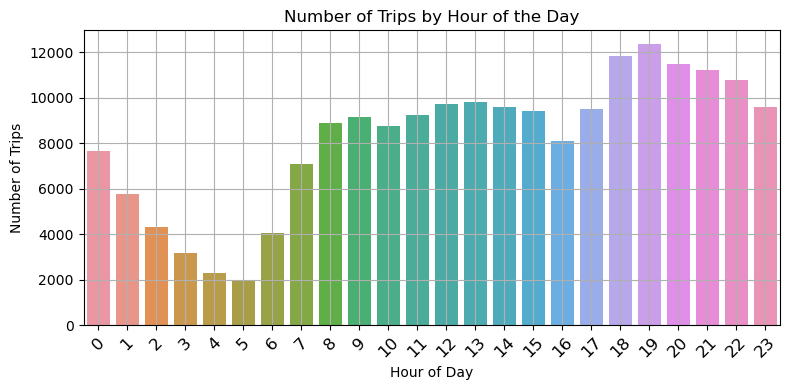

In [12]:
# Visualization: Trips by Hour of the Day (Bar Plot)
plt.figure(figsize=(8, 4))
sns.countplot(data=Uber_df_cleaned, x='hour')
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

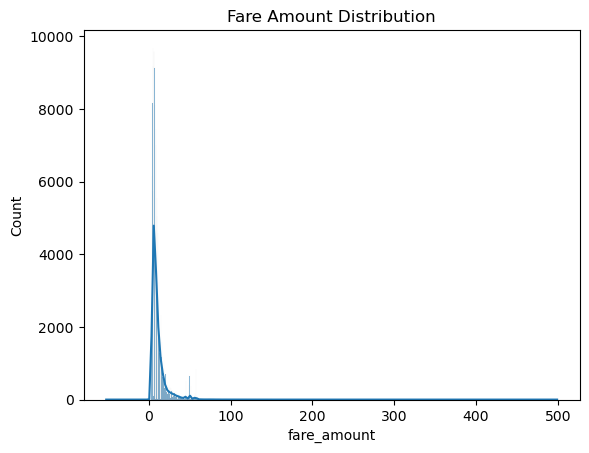

In [13]:
# Visualization: Trip over Time (Fare Distribution)
sns.histplot(Uber_df_cleaned['fare_amount'], kde=True)
plt.title('Fare Amount Distribution')
plt.show()

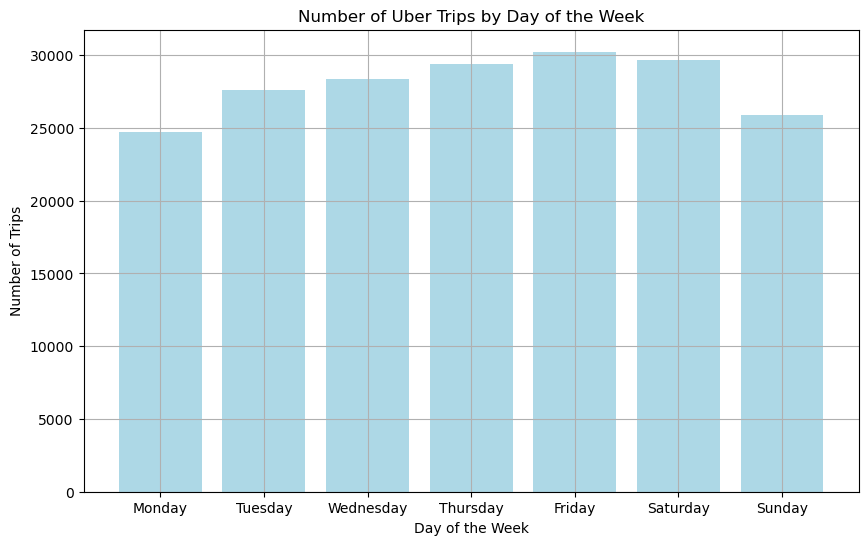

In [14]:
# Visualization: Trips by Day of the Week (Bar Plot)
trips_by_day = Uber_df_cleaned['day_of_week'].value_counts()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_by_day = trips_by_day.reindex(days_order, fill_value=0)

plt.figure(figsize=(10, 6))
plt.bar(trips_by_day.index, trips_by_day.values, color='lightblue')
plt.title('Number of Uber Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

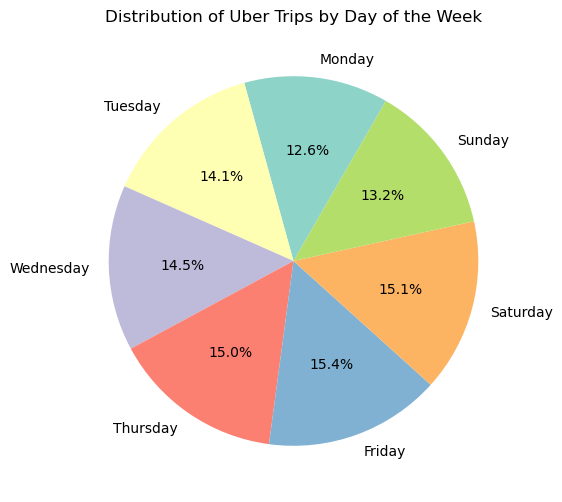

In [15]:
# Visualization: Percent of Trips by Day of the Week (Pie Chart)
plt.figure(figsize=(8, 6))
plt.pie(trips_by_day.values, labels=trips_by_day.index, autopct='%1.1f%%', colors=sns.color_palette("Set3", n_colors=7), startangle=60)
plt.title('Distribution of Uber Trips by Day of the Week')
plt.show()

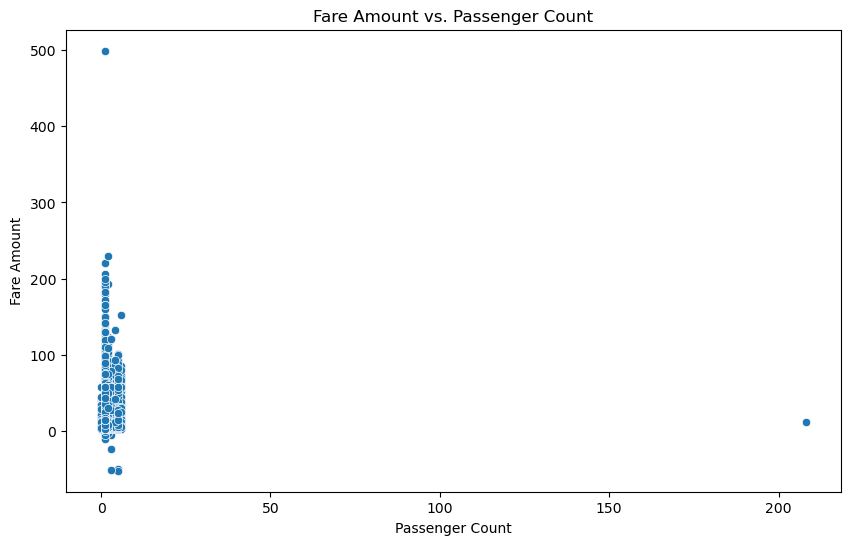

In [16]:
# Visualization: Fare Amount vs Passenger Count (Scatter Plot)
plt.figure(figsize=(10,6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=Uber_df_cleaned)
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.show()

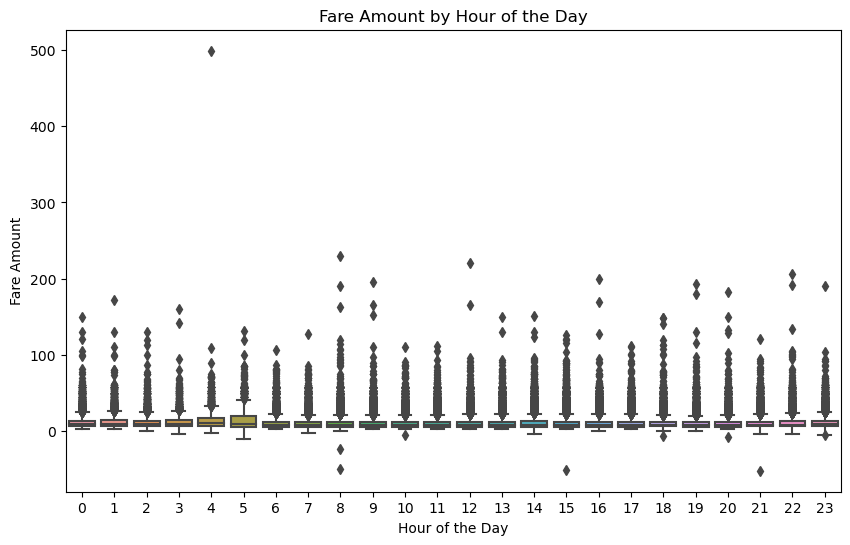

In [17]:
# Visualization: Fare Amount by Hour of the Day (Box Plot)
plt.figure(figsize=(10,6))
sns.boxplot(x='hour', y='fare_amount', data=Uber_df_cleaned)
plt.title('Fare Amount by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Fare Amount')
plt.show()

# Hypothesis Testing for Uber Fare Prediction

1️⃣ Peak-Hour vs. Non-Peak Hour Fares

    H₀: No significant difference in fares between peak and non-peak hours.
    H₁: Peak-hour fares are significantly higher than non-peak fares.
    Test Used: T-test (Independent Samples)
    Expected Output: T-statistic & p-value

2️⃣ Passenger Count vs. Fare

    H₀: No difference in fares based on the number of passengers.
    H₁: Different passenger counts affect fare pricing.
    Test Used: ANOVA (F-test)
    Expected Output: F-statistic & p-value

3️⃣ Distance vs. Fare Correlation

    H₀: No relationship between trip distance and fare.
    H₁: Significant correlation between distance and fare.
    Test Used: Pearson Correlation Test
    Expected Output: Correlation coefficient & p-value

In [18]:
from scipy.stats import ttest_ind, pearsonr, f_oneway
import numpy as np

In [19]:
# Hypothesis 1: Peak-hour fares vs. Non-peak fares
def peak_hour_fare_test(df):
    peak_hours = df[(df['hour'] >= 6) & (df['hour'] <= 9) | (df['hour'] >= 17) & (df['hour'] <= 20)]['fare_amount']
    non_peak_hours = df[~((df['hour'] >= 6) & (df['hour'] <= 9) | (df['hour'] >= 17) & (df['hour'] <= 20))]['fare_amount']
    t_stat, p_value = ttest_ind(peak_hours, non_peak_hours, equal_var=False)
    print(f"T-Test for Peak vs. Non-Peak Hours: T-stat={t_stat:.2f}, P-value={p_value:.4f}")
    return p_value

In [34]:
peak_hour_fare_test(Uber_df_cleaned)

T-Test for Peak vs. Non-Peak Hours: T-stat=-13.01, P-value=0.0000


1.166462590525201e-38

In [35]:
# Hypothesis 2: Passenger count vs. Fare (ANOVA)
def passenger_fare_test(df):
    groups = [df[df['passenger_count'] == x]['fare_amount'] for x in df['passenger_count'].unique()]
    f_stat, p_value = f_oneway(*groups)
    print(f"ANOVA Test for Passenger Count vs. Fare: F-stat={f_stat:.2f}, P-value={p_value:.4f}")
    return p_value

In [36]:
passenger_fare_test(Uber_df_cleaned)

ANOVA Test for Passenger Count vs. Fare: F-stat=19.80, P-value=0.0000


1.0151775599918118e-26

In [37]:
# Hypothesis 3: Distance vs. Fare correlation
def distance_fare_correlation(df):
    df['trip_distance'] = np.sqrt((df['pickup_longitude'] - df['dropoff_longitude'])**2 + 
                                  (df['pickup_latitude'] - df['dropoff_latitude'])**2)
    corr, p_value = pearsonr(df['trip_distance'], df['fare_amount'])
    print(f"Correlation between Distance and Fare: Pearson Corr={corr:.2f}, P-value={p_value:.4f}")
    return corr, p_value

In [38]:
distance_fare_correlation(Uber_df_cleaned)

Correlation between Distance and Fare: Pearson Corr=0.29, P-value=0.0000


(0.28529776074948904, 0.0)

# Machine Learning Model -  Random Forest Regressor

In [22]:
# Data Splitting: Define features (X) and target variable (y)
X = Uber_df_cleaned[['hour', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
y = Uber_df_cleaned['fare_amount']

In [23]:
# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 156689
Test set size: 39173


In [24]:
# Model Training: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [26]:
# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 2.086837907646342
Mean Squared Error (MSE): 18.13929721633973
R² Score: 0.8139465013580557


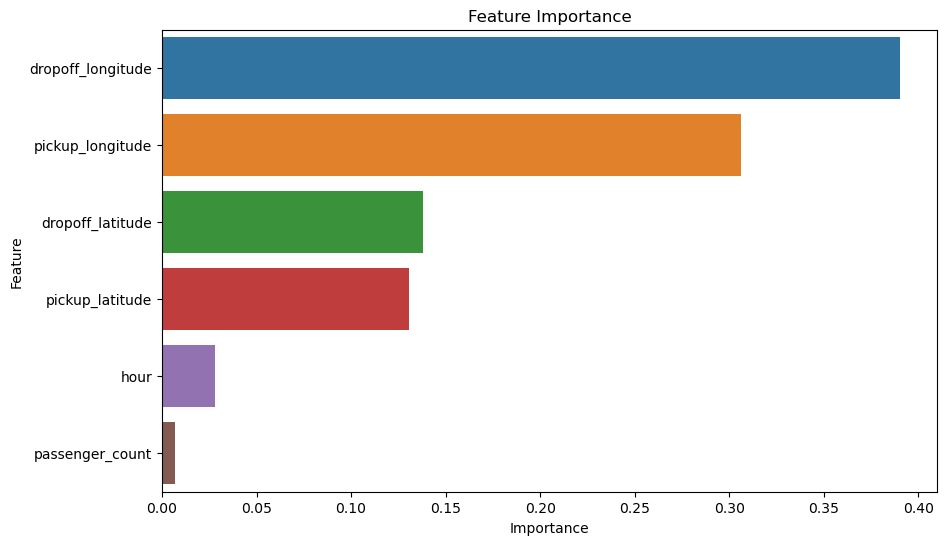

In [27]:
# Model Evaluation: Feature Importance Visualization
feature_importance = rf_model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance')
plt.show()

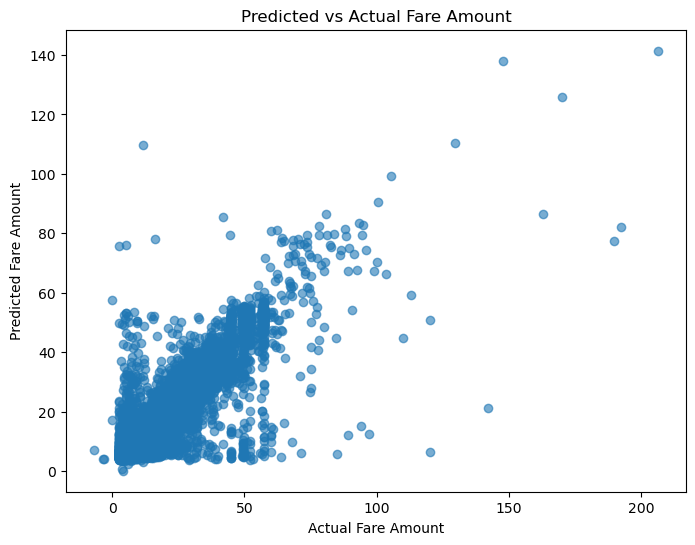

In [28]:
# Visualization: Predictions vs Actual Fare Amount
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title('Predicted vs Actual Fare Amount')
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.show()

# Save the ML Model

In [29]:
# Save the trained Random Forest model
import joblib
joblib.dump(rf_model, "uber_fare_model.pkl")

# Load the saved model and make predictions
rf_model = joblib.load("uber_fare_model.pkl")

In [30]:
# Prediction Function
def predict_fare(hour, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude):
    # Define feature order
    feature_order = ['hour', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
    
    # Create DataFrame in correct order
    sample_trip = pd.DataFrame([[hour, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude]],
                               columns=feature_order)

    # Predict fare
    predicted_fare = rf_model.predict(sample_trip)
    
    return round(predicted_fare[0], 2)

# Prediction on sample data 

In [31]:
# Example usage of the prediction function
predicted_price = predict_fare(13, 5, -73.9855, 40.7580, -74.0000, 40.7128)
print(f"Predicted Fare Amount: ${predicted_price}")

Predicted Fare Amount: $16.05


# A/B Testing: Simulating two fare models

A/B Testing: Fare Increase Strategy

    H₀: A 10% fare increase does not significantly change the fare distribution.
    H₁: A 10% fare increase significantly changes fares.
    Test Used: T-test (Independent Samples)
    Expected Output: T-statistic & p-value

In [33]:
# A/B Testing: Simulating two fare models
def ab_test_fare(df):
    np.random.seed(42)
    df['group'] = np.random.choice(['A', 'B'], size=len(df))
    df['new_fare'] = df.apply(lambda row: row['fare_amount'] * 1.1 if row['group'] == 'B' else row['fare_amount'], axis=1)
    group_A = df[df['group'] == 'A']['fare_amount']
    group_B = df[df['group'] == 'B']['new_fare']
    t_stat, p_value = ttest_ind(group_A, group_B, equal_var=False)
    print(f"A/B Testing: T-stat={t_stat:.2f}, P-value={p_value:.4f}")
    return p_value

In [39]:
ab_test_fare(Uber_df_cleaned)

A/B Testing: T-stat=-23.46, P-value=0.0000


1.5968916584756127e-121